In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
endangeredSpecies = pd.read_csv('endangeredAmphibian.csv')
endangeredSpecies.head(5)

,Unnamed: 0,identificacion,nombre_cientifico,reino,filo,clase,orden,familia,genero,epiteto_especifico,estado_taxonomico,estado_de_amenaza,coordenadas,location_info,display_name,town,state_district,country,temperature,humidity
0,0,2431315,Bolitoglossa capitana,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,capitana,Válido,CR,"[(4.53148, -74.336), (4.53148, -74.336), (4.53...","{'place_id': 298208485, 'licence': 'Data © Ope...","Granada, Sumapaz, RAP (Especial) Central, Colo...",Granada,Sumapaz,Colombia,13.892222,84.111111
1,1,9338198,Bolitoglossa guaneae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,guaneae,Válido,VU,"[(5.617806, -73.956917), (5.617694, -73.956806...","{'place_id': 298487144, 'licence': 'Data © Ope...","Llano Grande, Pauna, Occidente, Boyacá, RAP (E...",NaN,Occidente,Colombia,17.191471,95.705882
2,2,2431289,Bolitoglossa hiemalis,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hiemalis,Válido,VU,"[(4.063167, -76.499361), (4.063167, -76.499361...","{'place_id': 298065881, 'licence': 'Data © Ope...","Riofrío, Centro, Valle del Cauca, RAP Pacífico...",NaN,Centro,Colombia,6.780909,97.000000
3,3,2431296,Bolitoglossa hypacra,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hypacra,Válido,EN,"[(6.453389, -76.099083), (6.453389, -76.099083...","{'place_id': 298122804, 'licence': 'Data © Ope...","Sendero a Campanas, Urrao, Suroeste, Antioquia...",Urrao,Suroeste,Colombia,5.942759,97.034483
4,4,9577531,Bolitoglossa leandrae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,leandrae,Válido,CR,"[(4.86, -73.26), (4.86, -73.26), (4.15, -73.65)]","{'place_id': 298066345, 'licence': 'Data © Ope...","Marginal de la Selva, Santa María, Neira, Boya...",Santa María,Neira,Colombia,19.136667,95.000000


In [4]:
endangeredSpecies.columns

Index(['Unnamed: 0', 'identificacion', 'nombre_cientifico', 'reino', 'filo',
       'clase', 'orden', 'familia', 'genero', 'epiteto_especifico',
       'estado_taxonomico', 'estado_de_amenaza', 'coordenadas',
       'location_info', 'display_name', 'town', 'state_district', 'country',
       'temperature', 'humidity'],
      dtype='object')

In [5]:
endangeredSpecies.drop(columns=['Unnamed: 0', 'location_info'], inplace=True)

In [6]:
endangeredSpecies.rename(columns={
    'identificacion': 'id',
    'nombre_cientifico': 'scientific_name',
    'reino': 'kingdom',
    'filo': 'phylum',
    'clase': 'class',
    'orden': 'order',
    'familia': 'family',
    'genero': 'genus',
    'epiteto_especifico': 'specific_epithet',
    'estado_taxonomico': 'taxonomic_status',
    'estado_de_amenaza': 'threat_status',
    'coordenadas': 'coordinates',
    'display_name': 'display_name',
    'town': 'town',
    'state_district': 'state_district',
    'country': 'country',
    'temperature': 'temperature',
    'humidity': 'humidity'
}, inplace=True)

In [7]:
endangeredSpecies = endangeredSpecies[['id', 'scientific_name', 'kingdom', 'phylum', 'class', 'order',
                                       'family', 'genus', 'specific_epithet', 'taxonomic_status',
                                       'threat_status', 'coordinates', 'display_name',
                                       'town', 'state_district', 'country', 'temperature', 'humidity']]

In [14]:
print(endangeredSpecies.shape)

(288, 18)


In [10]:
endangeredSpecies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                288 non-null    int64  
 1   scientific_name   288 non-null    object 
 2   kingdom           288 non-null    object 
 3   phylum            288 non-null    object 
 4   class             288 non-null    object 
 5   order             288 non-null    object 
 6   family            288 non-null    object 
 7   genus             288 non-null    object 
 8   specific_epithet  288 non-null    object 
 9   taxonomic_status  288 non-null    object 
 10  threat_status     288 non-null    object 
 11  coordinates       288 non-null    object 
 12  display_name      197 non-null    object 
 13  town              92 non-null     object 
 14  state_district    163 non-null    object 
 15  country           197 non-null    object 
 16  temperature       197 non-null    float64
 1

In [11]:
endangeredSpecies.describe(include='O')

,scientific_name,kingdom,phylum,class,order,family,genus,specific_epithet,taxonomic_status,threat_status,coordinates,display_name,town,state_district,country
count,288,288,288,288,288,288,288,288,288,288,288,197,92,163,197
unique,288,1,1,1,3,11,36,272,2,3,198,155,57,36,3
top,Bolitoglossa capitana,Animalia,Chordata,Amphibia,Anura,Strabomantidae,Pristimantis,ruizi,Válido,EN,[],"El Cairo, Norte, Valle del Cauca, RAP Pacífico...",Urrao,Norte,Colombia
freq,1,288,288,288,277,128,110,4,287,122,91,11,6,20,192


In [12]:
endangeredSpecies.duplicated().value_counts()

False    288
dtype: int64

In [13]:
endangeredSpecies.isnull().sum()

id                    0
scientific_name       0
kingdom               0
phylum                0
class                 0
order                 0
family                0
genus                 0
specific_epithet      0
taxonomic_status      0
threat_status         0
coordinates           0
display_name         91
town                196
state_district      125
country              91
temperature          91
humidity             91
dtype: int64

In [15]:
endangeredSpecies.to_csv('endangeredAmphibian.csv', index=False)

# Plotting

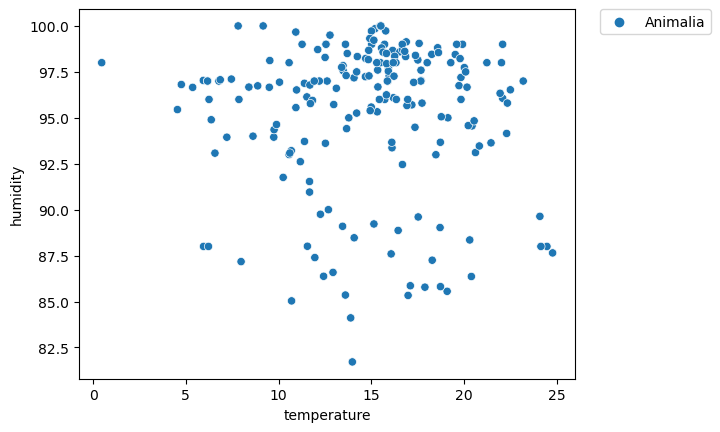

In [36]:
sns.scatterplot(x='temperature', y='humidity', hue='kingdom', data=endangeredSpecies)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

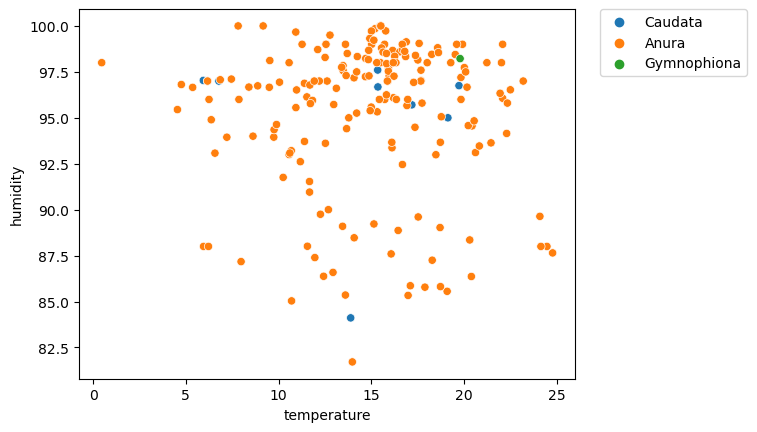

In [35]:
sns.scatterplot(x='temperature', y='humidity', hue='order', data=endangeredSpecies)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

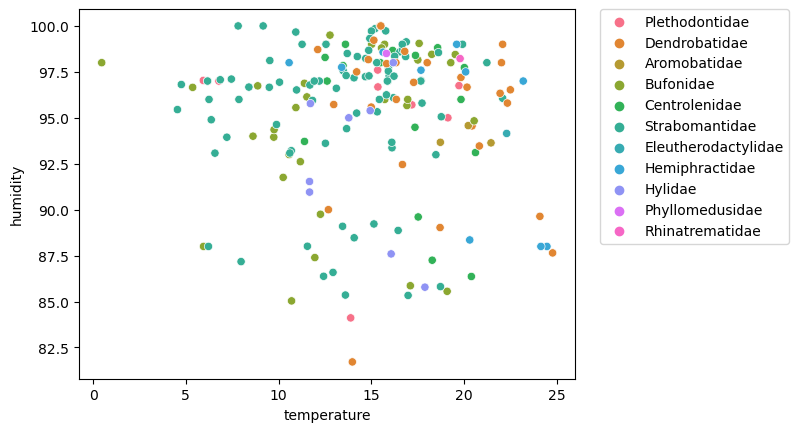

In [34]:
sns.scatterplot(x='temperature', y='humidity', hue='family', data=endangeredSpecies)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

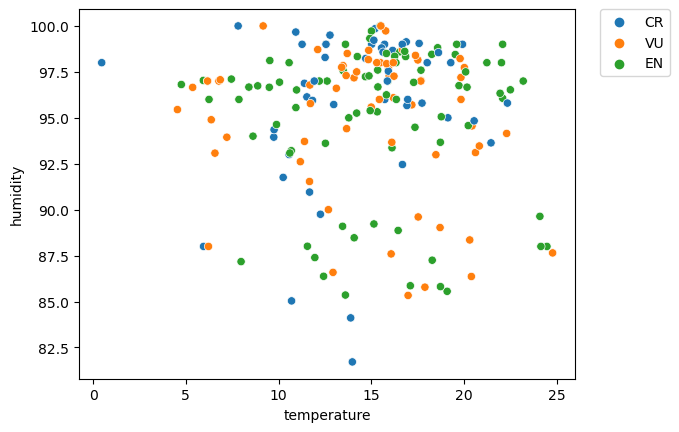

In [32]:
sns.scatterplot(x='temperature', y='humidity', hue='threat_status', data=endangeredSpecies)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

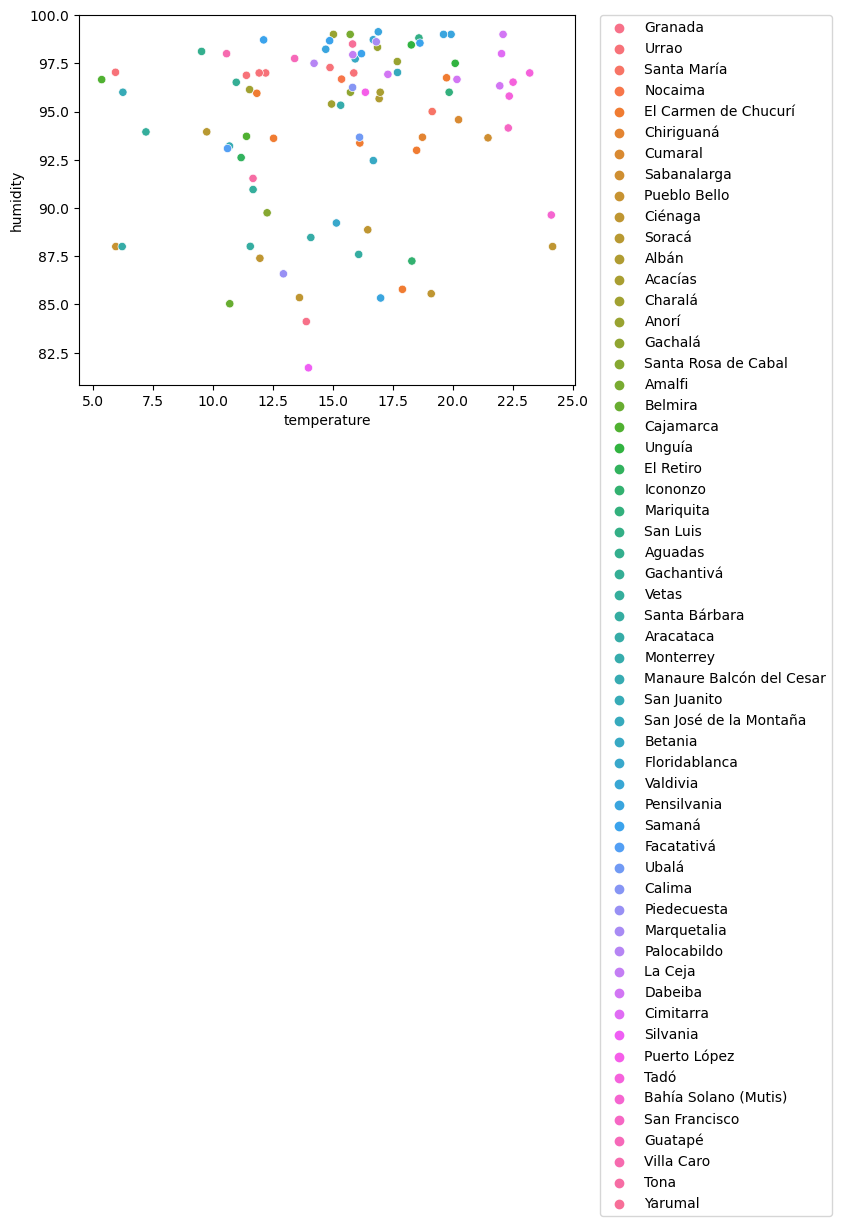

In [31]:
sns.scatterplot(x='temperature', y='humidity', hue='town', data=endangeredSpecies)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()